# KNN

In [124]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [125]:
from sklearn.datasets import make_classification
x, y = make_classification(n_samples=1000, n_classes=2, n_features=2, n_informative=2, n_redundant=0, n_repeated=0)

In [126]:
x

array([[ 2.04452482, -1.35278854],
       [-1.90257988, -2.06272041],
       [-1.52756041, -0.9455986 ],
       ...,
       [ 1.7195597 ,  0.35628633],
       [-0.08334765,  0.81784299],
       [-1.58782531, -1.37222094]])

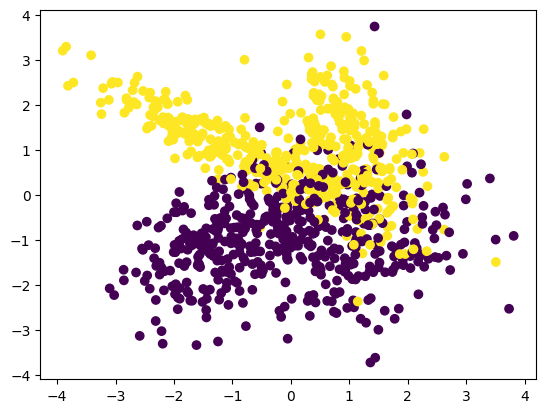

In [127]:
plt.scatter(x[:,0], x[:,1], c=y)

In [128]:
# data = pd.read_csv(r'F:\Coding\Gen Ai\Machine Learning\Supervised\Ensemble Learning\Stacking_Blending\heart.csv')

In [129]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [130]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=7)

In [131]:
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=7)

In [132]:
pred = knn.predict(x_test)

In [133]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, pred)

0.855

In [134]:
query = np.array([[0.5, 0.5]])
query1 = np.array([[-1, -3]])
query2 = np.array([[2.7, 1]])
print(knn.predict(query))
print(knn.predict(query1))
print(knn.predict(query2))

[1]
[0]
[1]


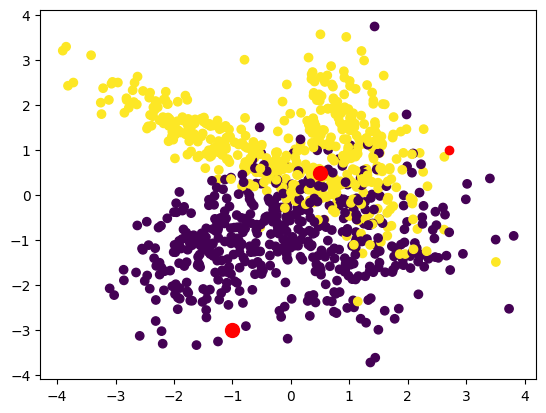

In [135]:
plt.scatter(x[:, 0],x[:, 1], c=y)
plt.plot(0.5, 0.5, markersize=10, marker='o', color='red')
plt.plot(-1, -3, markersize=10, marker='o', color='red')
plt.plot(2.7, 1, marker='o', color='red')

# How To select best **`k`** value

In [136]:
score = []

for i in range(1, 50):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train, y_train)
    pred = knn.predict(x_test)
    score.append(accuracy_score(y_test, pred))
    

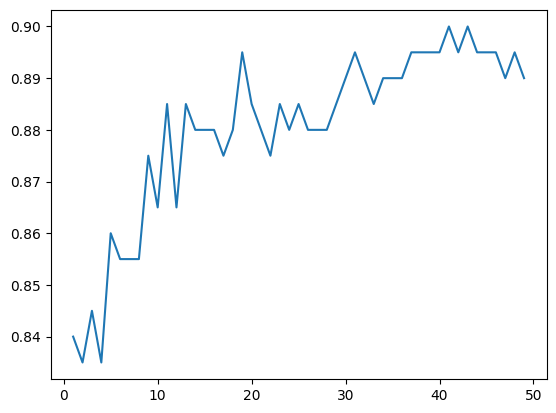

In [137]:
plt.plot(range(1, 50), score)

Decision Surface of KNN

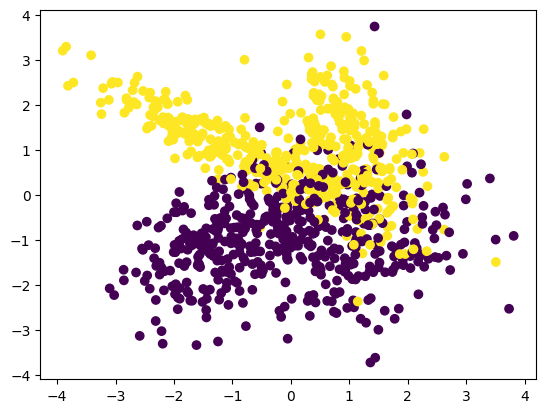

In [138]:
plt.scatter(x[:,0], x[:,1], c=y)

In [139]:
x_min, x_max = x[:, 0].min() - 1, x[:, 0].max() + 1
y_min, y_max = x[:, 1].min() - 1, x[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

In [142]:
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

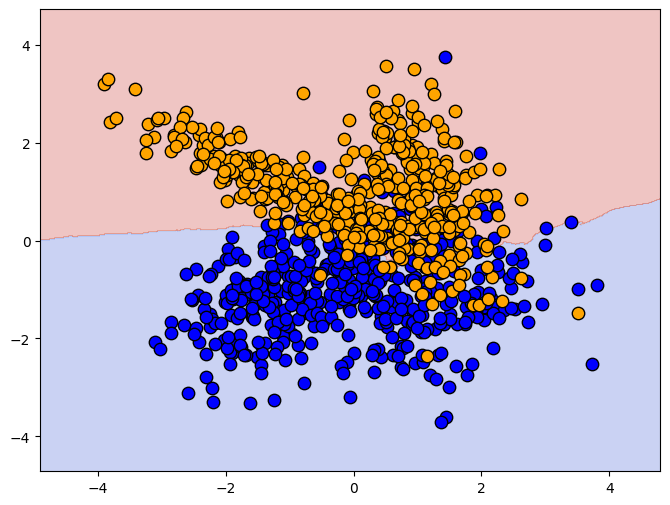

In [146]:
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
for label, color in zip([0, 1], ['blue', 'orange']):
    plt.scatter(x[y == label, 0], x[y == label, 1], 
                c=color, label=f"Class {label}", edgecolors='k', s=80)